<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Big-Eyes-Prophet-Model/blob/main/BIGEYE_Stock_Market_Prediction_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.utils import plot_model
from datetime import datetime

In [ ]:
# Install required system dependencies
!apt-get install -y build-essential libssl-dev

# Install additional dependencies
!pip install cython numpy pystan==2.19.1.1

# Install fbprophet from community-maintained wheel
!pip install prophet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libssl-dev is already the newest version (3.0.2-0ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61976176 sha256=f5e105cbeb5a59efb81efae74580b09a74c653a65eb12a6dfd48667b34a291b4
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [ ]:
end_date = datetime.today().strftime('%Y-%m-%d')
df = yf.download('BIG', start='2014-01-01', end=end_date,interval="1d")

[*********************100%%**********************]  1 of 1 completed


### **Exploring the Dataset**

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,32.299999,32.340000,31.950001,32.040001,24.403324,698000
2014-01-03,32.090000,32.340000,32.040001,32.130001,24.471880,304200
2014-01-06,32.130001,32.230000,31.290001,31.379999,23.900637,1471900
2014-01-07,31.440001,31.969999,31.330000,31.650000,24.106285,1778700
2014-01-08,31.620001,32.090000,31.350000,32.040001,24.403324,1638800
...,...,...,...,...,...,...
2024-01-08,7.150000,7.590000,7.150000,7.440000,7.440000,745000
2024-01-09,7.300000,7.400000,7.120000,7.170000,7.170000,734700
2024-01-10,7.140000,7.260000,6.950000,7.000000,7.000000,911300


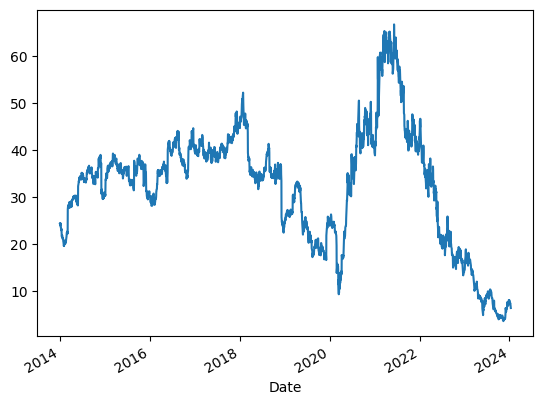

In [ ]:
import matplotlib.pyplot as plt
df['Adj Close'].plot()
plt.show()

### **Dropping the Close Column**

In [ ]:
df.drop('Close', axis=1,inplace=True)

In [ ]:
df=df[['Open','High','Low','Adj Close','Volume']].reset_index()
df.columns=['Date','Open','High','Low','Adj Close','Volume']

In [ ]:
df.describe()

,Open,High,Low,Adj Close,Volume
count,2525.000000,2525.000000,2525.000000,2525.000000,2.525000e+03
mean,38.457248,39.138749,37.788325,32.388142,1.278598e+06
std,15.144124,15.321707,14.989515,12.678467,1.258351e+06
min,3.710000,3.710000,3.470000,3.590000,2.651000e+05
25%,27.690001,28.350000,26.990000,23.583355,7.599000e+05
50%,43.090000,43.669998,42.360001,34.752190,1.005900e+06
75%,48.259998,49.000000,47.669998,39.972649,1.419100e+06
max,72.410004,73.230003,70.099998,66.754387,2.148220e+07


In [ ]:
df

,Date,Open,High,Low,Adj Close,Volume
0,2014-01-02,32.299999,32.340000,31.950001,24.403324,698000
1,2014-01-03,32.090000,32.340000,32.040001,24.471880,304200
2,2014-01-06,32.130001,32.230000,31.290001,23.900637,1471900
3,2014-01-07,31.440001,31.969999,31.330000,24.106285,1778700
4,2014-01-08,31.620001,32.090000,31.350000,24.403324,1638800
...,...,...,...,...,...,...
2520,2024-01-08,7.150000,7.590000,7.150000,7.440000,745000
2521,2024-01-09,7.300000,7.400000,7.120000,7.170000,734700
2522,2024-01-10,7.140000,7.260000,6.950000,7.000000,911300
2523,2024-01-11,6.920000,6.930000,6.570000,6.670000,901100


### **Missing Value**

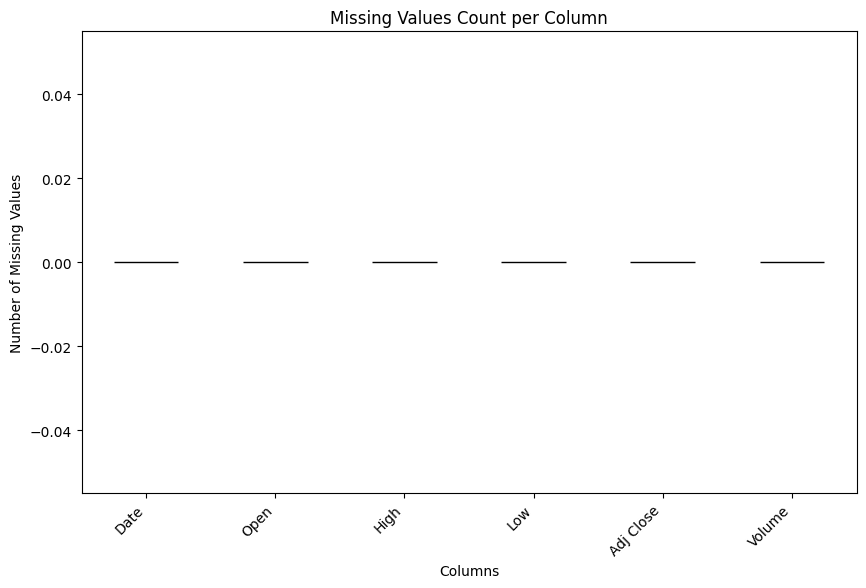

In [ ]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Correlation Identification**

<ipython-input-127-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

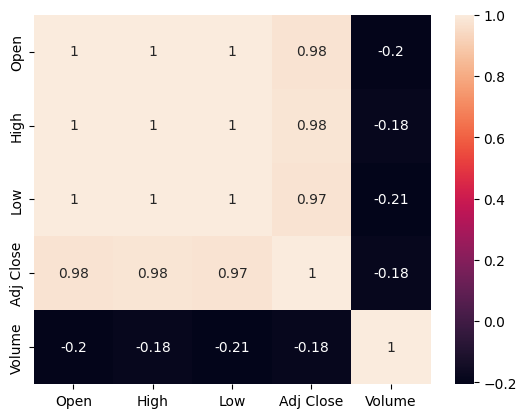

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
corr_matrix = df.corr()['Adj Close']
corr_matrix

<ipython-input-128-34b845c5d491>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()['Adj Close']


Open         0.976041
High         0.980235
Low          0.974543
Adj Close    1.000000
Volume      -0.183678
Name: Adj Close, dtype: float64

### **Plotting the graph**

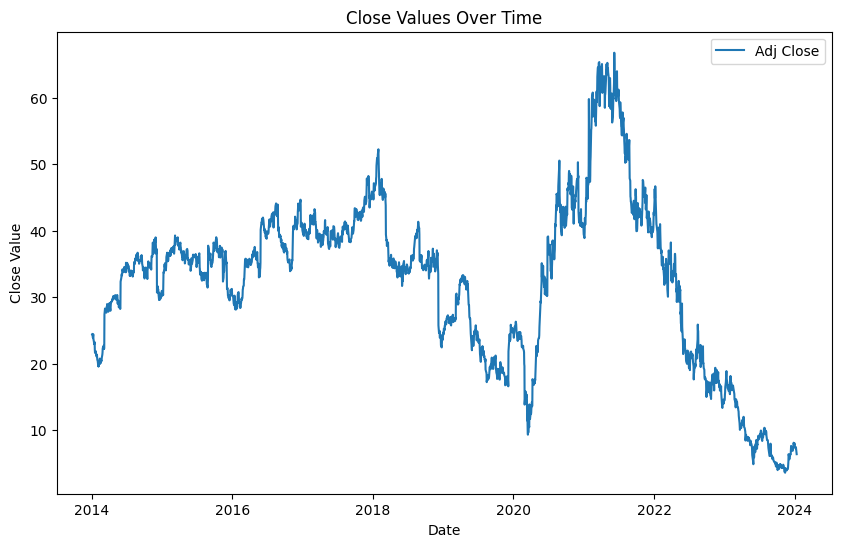

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the 'Close' values against the 'Date'
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.title('Close Values Over Time')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.show()

### **Creating the New Dataframe**

In [ ]:
selected_columns = ["Date", "Adj Close"]
new_df = df[selected_columns].copy()

In [ ]:
new_df

,Date,Adj Close
0,2014-01-02,24.403324
1,2014-01-03,24.471880
2,2014-01-06,23.900637
3,2014-01-07,24.106285
4,2014-01-08,24.403324
...,...,...
2520,2024-01-08,7.440000
2521,2024-01-09,7.170000
2522,2024-01-10,7.000000
2523,2024-01-11,6.670000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2525 non-null   datetime64[ns]
 1   Adj Close  2525 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.6 KB


In [ ]:
new_df.head()

,Date,Adj Close
0,2014-01-02,24.403324
1,2014-01-03,24.471880
2,2014-01-06,23.900637
3,2014-01-07,24.106285
4,2014-01-08,24.403324


In [ ]:
new_df.tail()

,Date,Adj Close
2520,2024-01-08,7.44
2521,2024-01-09,7.17
2522,2024-01-10,7.00
2523,2024-01-11,6.67
2524,2024-01-12,6.38


### **Renaming the Column**

In [ ]:
new_df=new_df.rename(columns={"Date": "ds", "Adj Close": "y"})

### **Fitting the Prophet Model**

In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(new_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeq44rg4/jwph1_fr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeq44rg4/ef309f1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41003', 'data', 'file=/tmp/tmppeq44rg4/jwph1_fr.json', 'init=/tmp/tmppeq44rg4/ef309f1h.json', 'output', 'file=/tmp/tmppeq44rg4/prophet_model96i43ilb/prophet_model-20240115100700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:07:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:07:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### **Predicting the one year data**

In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2885,2025-01-07,-18.354284,-29.317596,-6.876003
2886,2025-01-08,-18.418433,-29.164329,-6.296484
2887,2025-01-09,-18.440974,-29.380070,-6.294450
2888,2025-01-10,-18.473191,-29.311297,-6.712552
2889,2025-01-11,-18.230061,-29.131031,-6.673893


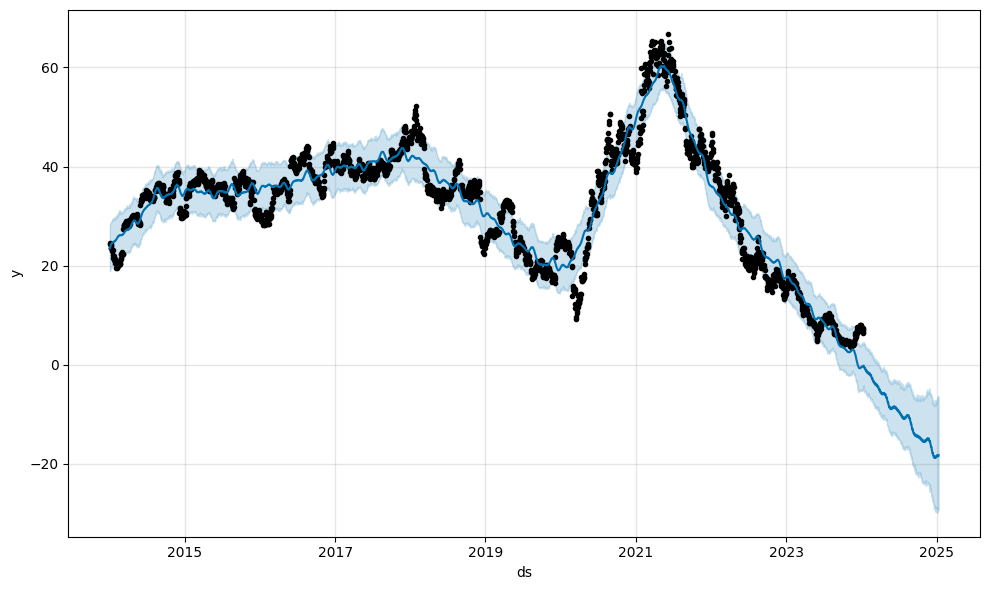

In [ ]:
fig1 = m.plot(forecast)

(19369.0, 20099.0)

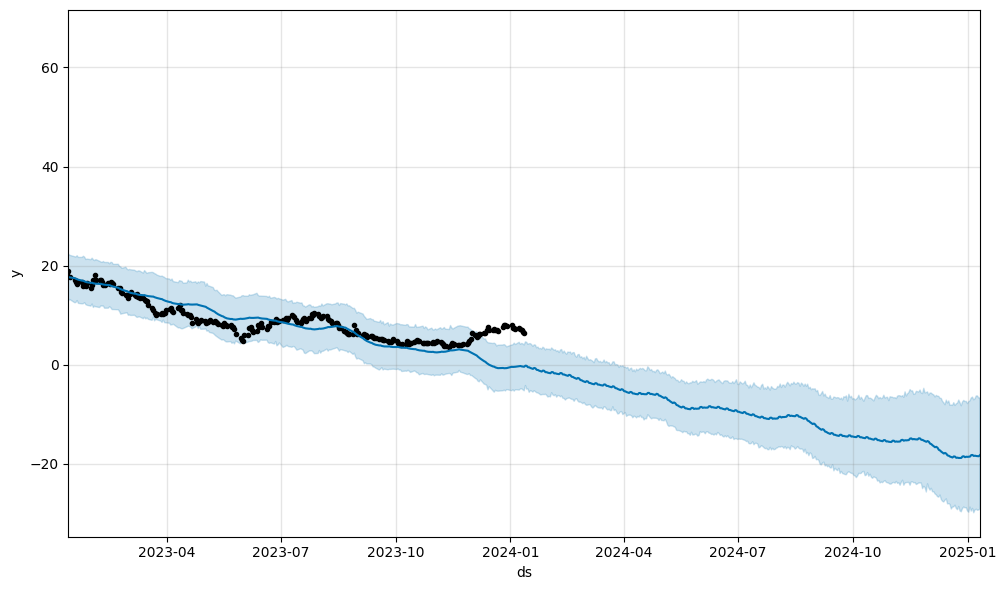

In [ ]:
# Plot the forecast, zoomed in on the last 365 days
fig1 = m.plot(forecast)
fig1.gca().set_xlim(pd.to_datetime(new_df['ds']).max() - pd.DateOffset(days=365), pd.to_datetime(future['ds']).max())

### **Predicting the one week data**

In [ ]:
#prediciton
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2527,2024-01-15,-0.509337,-5.042046,4.047079
2528,2024-01-16,-0.524657,-5.013276,4.006488
2529,2024-01-17,-0.659879,-5.145978,3.716631
2530,2024-01-18,-0.748696,-5.276082,3.938713
2531,2024-01-19,-0.840906,-5.301515,3.862267


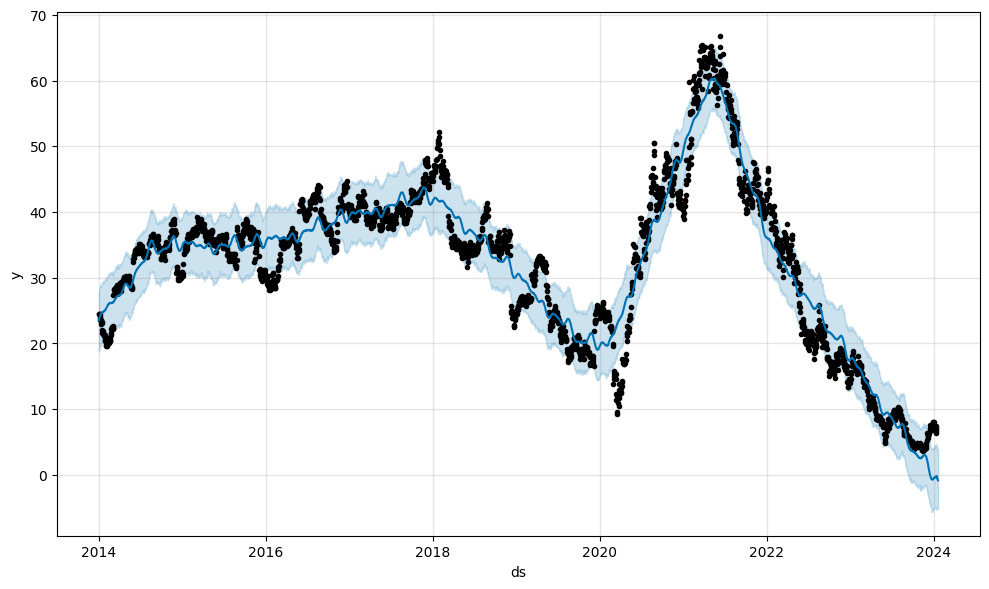

In [ ]:
fig1 = m.plot(forecast)

(19727.0, 19741.0)

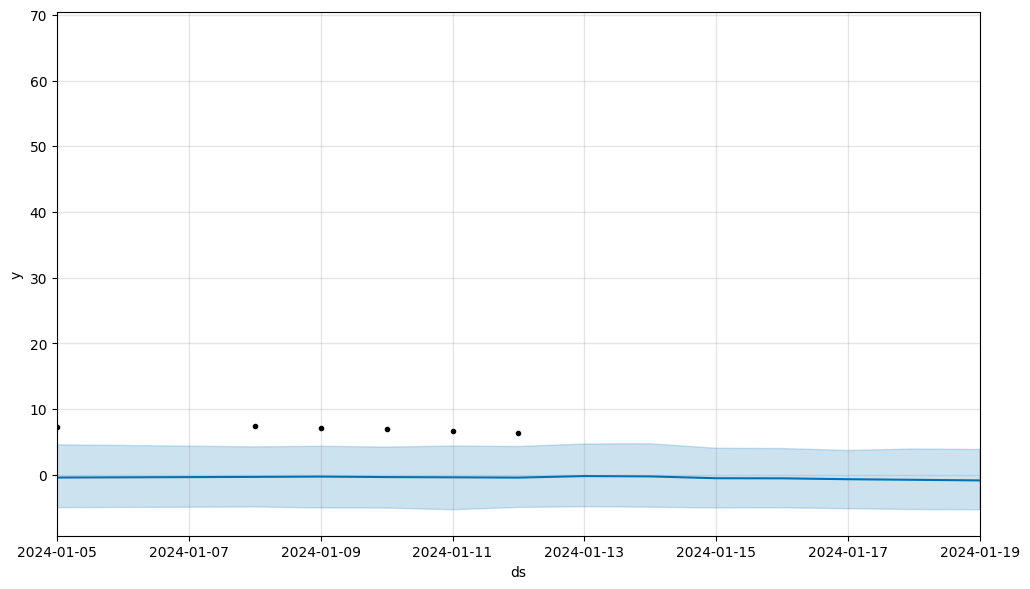

In [ ]:
# Plot the forecast, zoomed in on the last 7 days
fig1 = m.plot(forecast)
fig1.gca().set_xlim(pd.to_datetime(new_df['ds']).max() - pd.DateOffset(days=7), pd.to_datetime(future['ds']).max())

### **Predicting the one month data**

In [ ]:
#prediciton
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2550,2024-02-07,-1.820934,-6.533801,2.787063
2551,2024-02-08,-1.862548,-6.492315,2.500255
2552,2024-02-09,-1.906375,-6.581134,2.968312
2553,2024-02-10,-1.668380,-6.377211,2.836599
2554,2024-02-11,-1.704981,-6.050140,2.859919


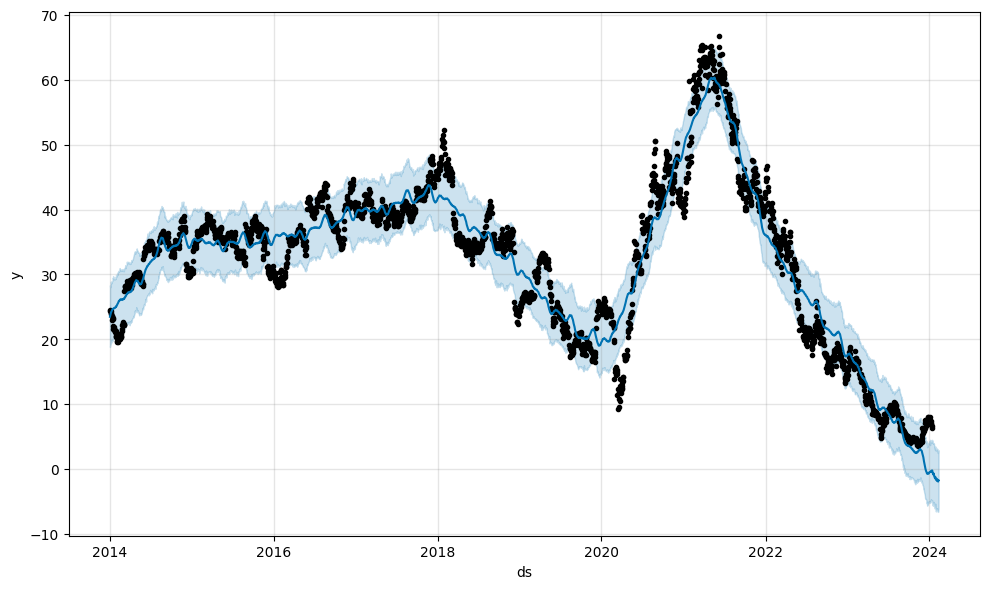

In [ ]:
fig1 = m.plot(forecast)

(19704.0, 19764.0)

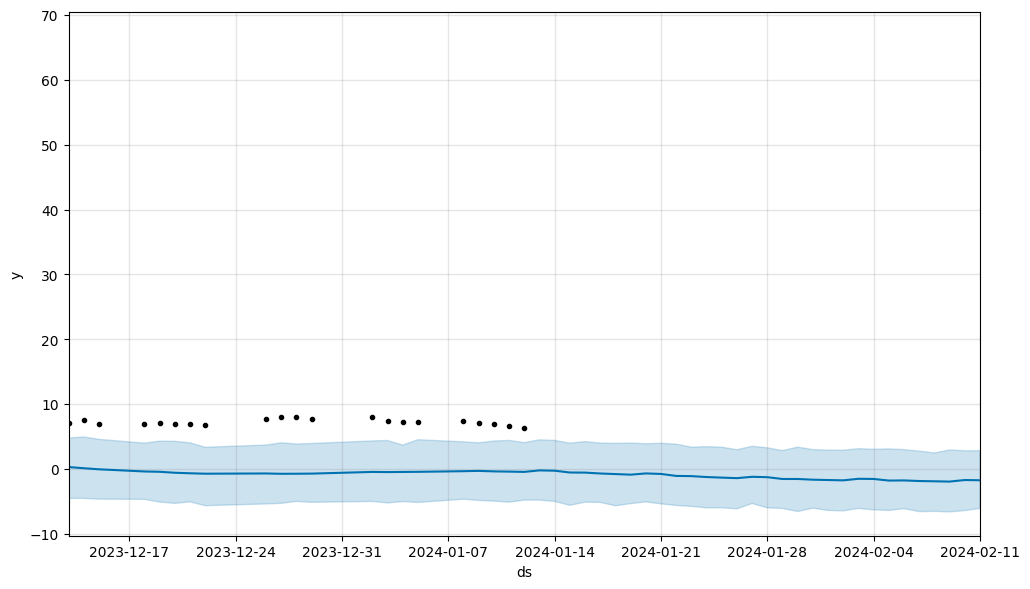

In [ ]:
# Plot the forecast, zoomed in on the last 30 days
fig1 = m.plot(forecast)
fig1.gca().set_xlim(pd.to_datetime(new_df['ds']).max() - pd.DateOffset(days=30), pd.to_datetime(future['ds']).max())

### **Predicting the 5 year data**

In [ ]:
future = m.make_future_dataframe(periods=1825)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4345,2029-01-06,-90.569039,-227.279879,34.628950
4346,2029-01-07,-90.557935,-225.872924,36.507454
4347,2029-01-08,-90.778495,-227.042195,35.174073
4348,2029-01-09,-90.738383,-227.468042,34.435380
4349,2029-01-10,-90.821989,-226.436344,34.889756


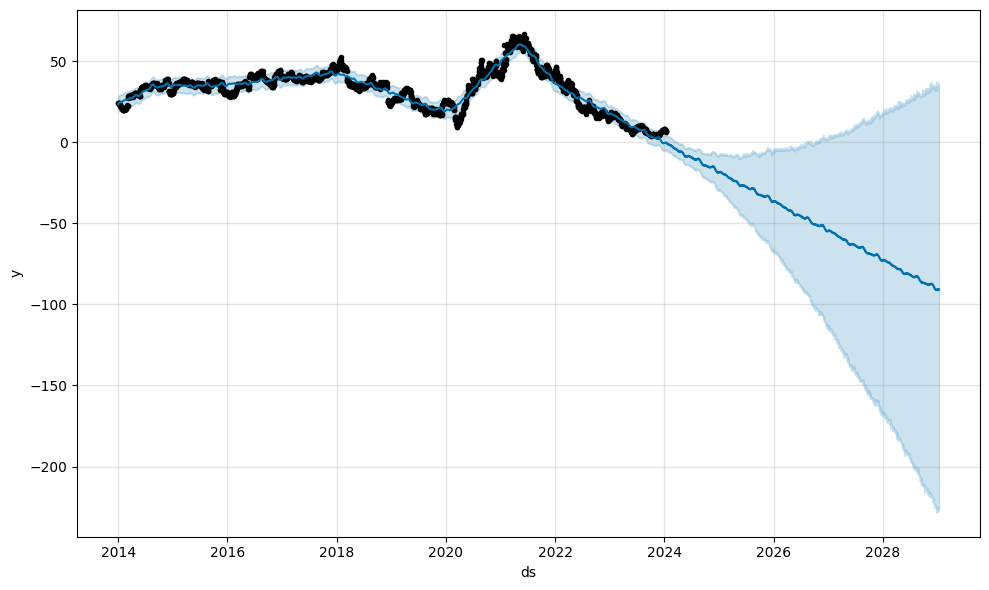

In [ ]:
fig1 = m.plot(forecast)

(17909.0, 21559.0)

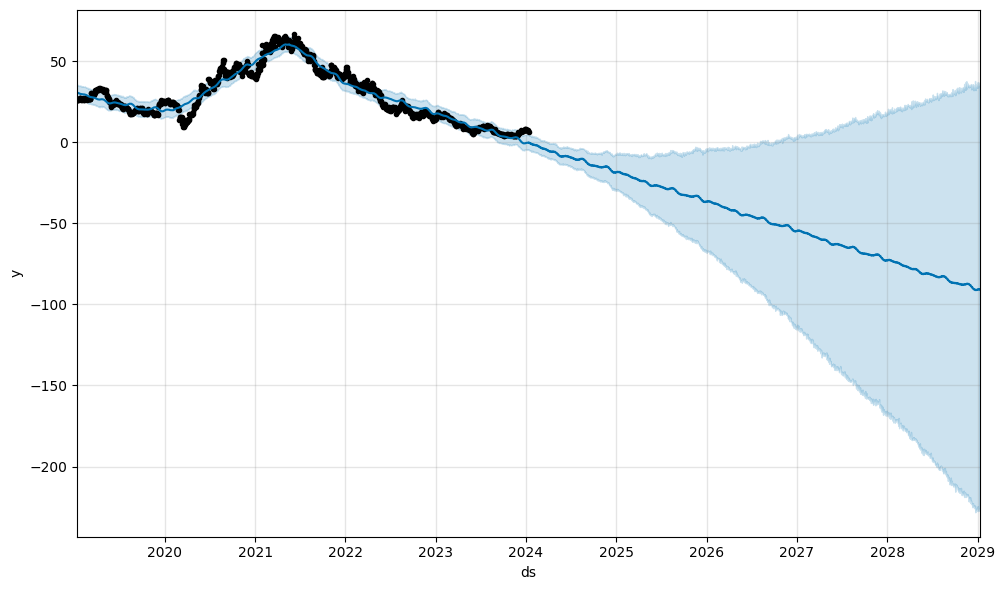

In [ ]:
# Plot the forecast, zoomed in on the last 5 years
fig1 = m.plot(forecast)
fig1.gca().set_xlim(pd.to_datetime(new_df['ds']).max() - pd.DateOffset(days=1825), pd.to_datetime(future['ds']).max())

### **Component of Time Series**

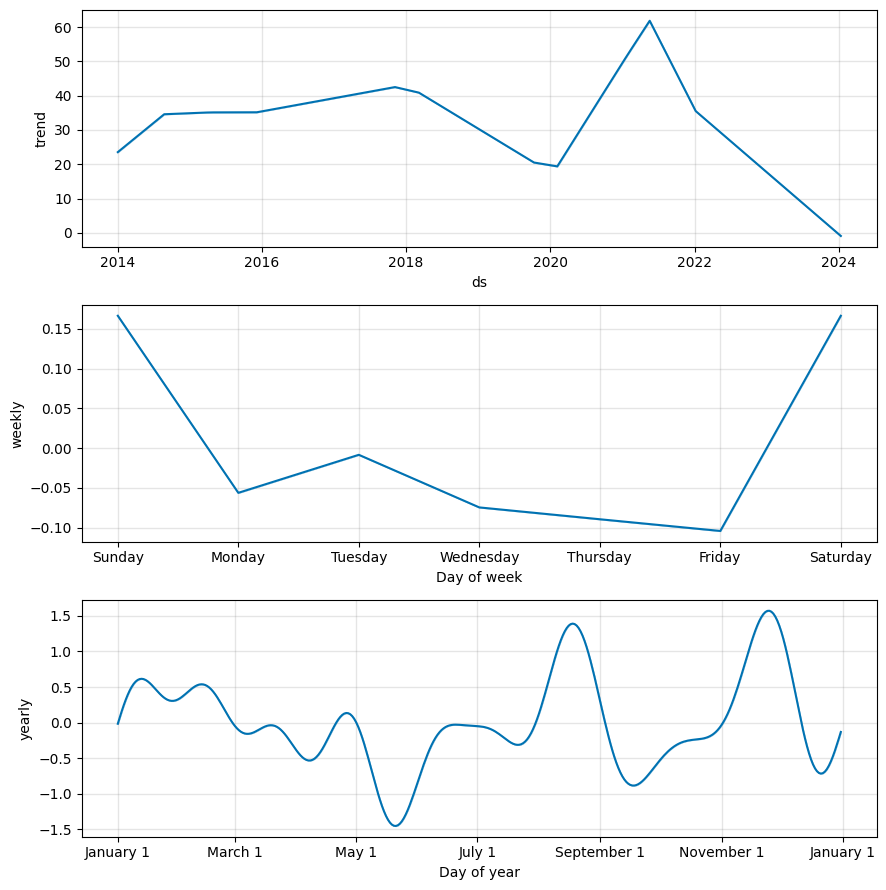

In [ ]:
future = m.make_future_dataframe(periods=0)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
figure2 = m.plot_components(forecast)

### **R2 Score**


In [ ]:
from sklearn.metrics import r2_score

# Extract the relevant columns from the forecast dataframe
predicted_values = forecast['yhat'].tail(len(new_df))

# Actual values from the original dataframe
actual_values = new_df['y']

# Calculate R2 score
r2 = r2_score(actual_values, predicted_values)
print(f'R-squared Score: {r2}')

R-squared Score: 0.9192224032800519


### **Change points plotting**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeq44rg4/upmkuqmx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeq44rg4/60a5akmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73561', 'data', 'file=/tmp/tmppeq44rg4/upmkuqmx.json', 'init=/tmp/tmppeq44rg4/60a5akmm.json', 'output', 'file=/tmp/tmppeq44rg4/prophet_model32jjh4op/prophet_model-20240115101039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


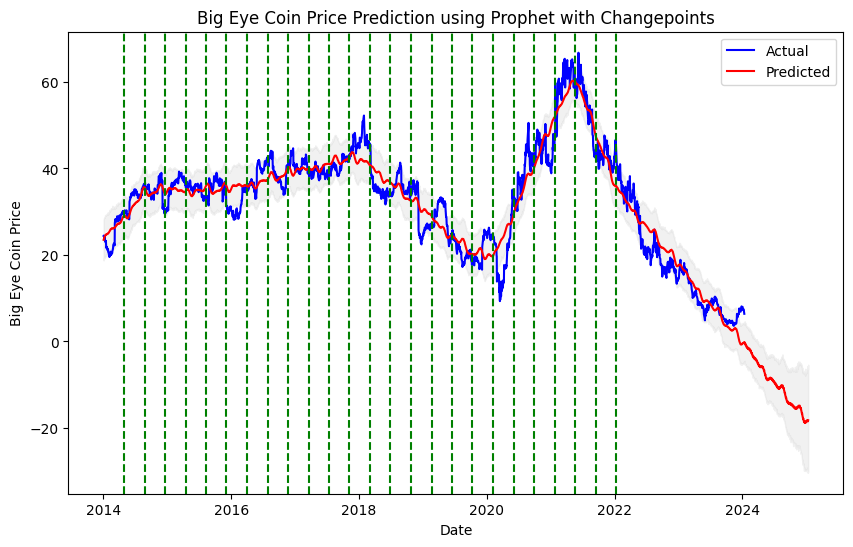

In [ ]:
# Initialize and fit the Prophet model with changepoints
m = Prophet(changepoint_prior_scale=0.05)  # Adjust changepoint_prior_scale as needed
m.fit(new_df)

# Create a dataframe with future dates for prediction
future = m.make_future_dataframe(periods=365)  # Adjust the periods as needed

# Generate predictions
forecast = m.predict(future)

# Plotting the actual values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(new_df['ds'], new_df['y'], label='Actual', color='blue')

# Plotting the predicted values
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')

# Highlighting the forecasted region
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgray', alpha=0.3)

# Adding dotted vertical lines for changepoints
for changepoint in m.changepoints:
    ax.axvline(changepoint, linestyle='--', color='green')

# Adding labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Big Eye Coin Price')
ax.set_title('Big Eye Coin Price Prediction using Prophet with Changepoints')
ax.legend()

# Show the plot
plt.show()
